In [1]:
import numpy as np 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#from chainconsumer import chainConsumer
from chainconsumer import *
import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [11]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#data.describe()
#data.info()
#data.head()

In [12]:
data= data.drop(columns=['Insulin'])
data = data[~(data[data.columns[1:-1]] == 0).any(axis=1)]

In [8]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,2.926761,110.016901,69.912676,27.290141,31.429577,0.446315,29.222535
1,4.700565,143.118644,74.700565,32.977401,35.819774,0.616588,36.412429


In [9]:
data.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          2.926761      2  110.016901    106     69.912676     70   
1          4.700565      4  143.118644    144     74.700565     74   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           27.290141     27  31.429577   30.9                 0.446315   
1           32.977401     32  35.819774   34.6                 0.616588   

                      Age         
        median       mean median  
Outcome                           
0        0.368  29.222535     25  
1        0.542  36.412429     35

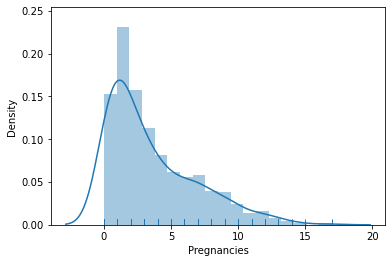

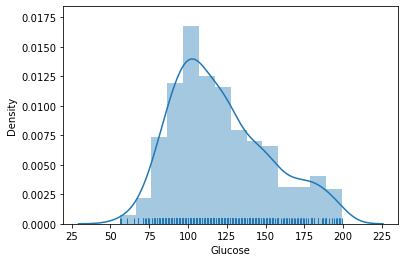

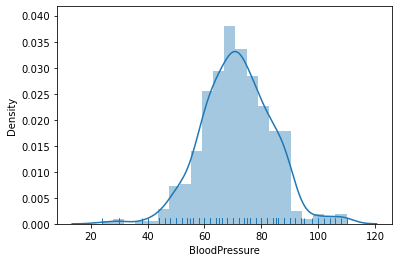

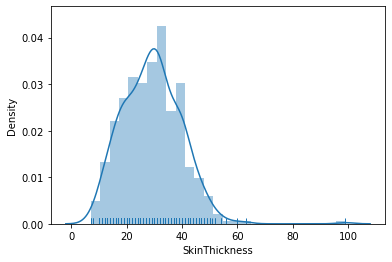

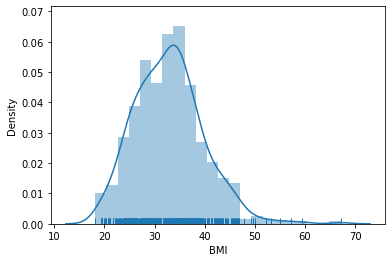

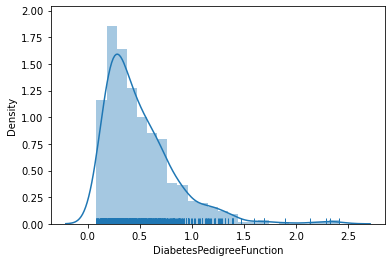

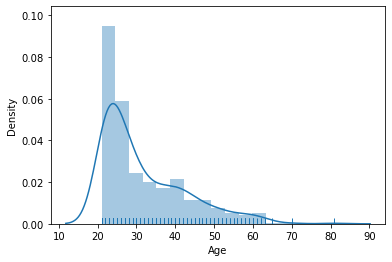

In [18]:
for i,col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col], rug=True);

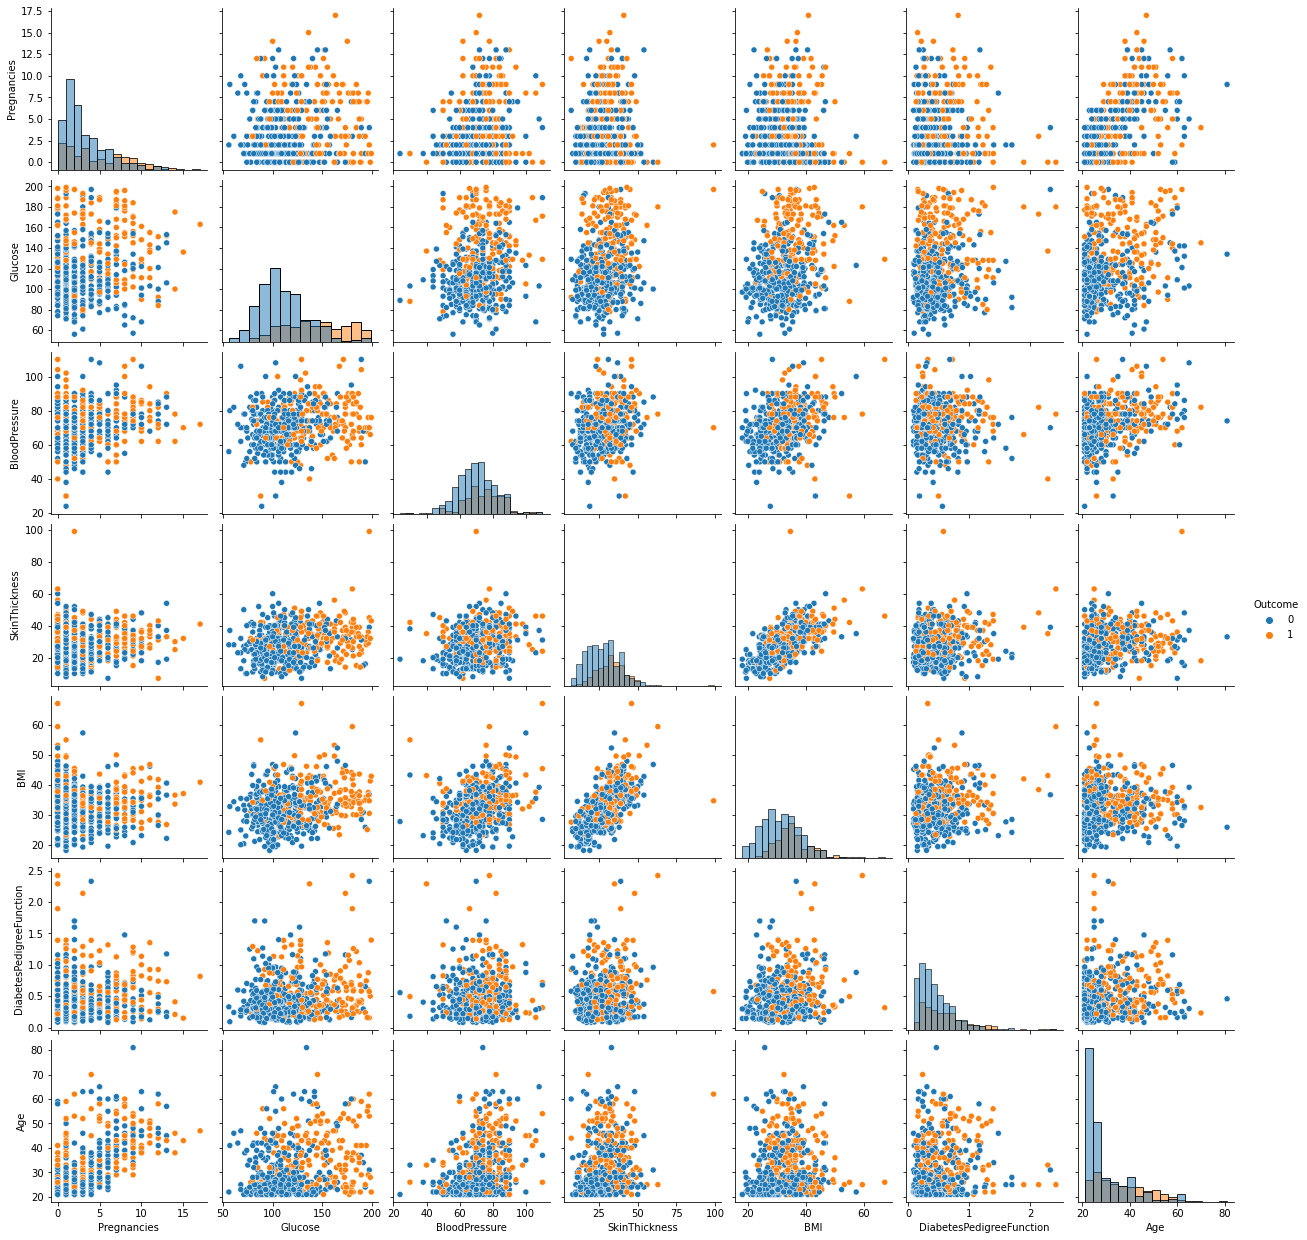

In [19]:
sns.pairplot(data, hue="Outcome", diag_kind = 'hist');

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125330,0.204663,0.095085,0.008576,0.007435,0.640747,0.252586
Glucose,0.125330,1.000000,0.219178,0.226590,0.247079,0.165817,0.278907,0.503614
BloodPressure,0.204663,0.219178,1.000000,0.226072,0.307357,0.008047,0.346939,0.183432
SkinThickness,0.095085,0.226590,0.226072,1.000000,0.647422,0.118636,0.161336,0.254874
BMI,0.008576,0.247079,0.307357,0.647422,1.000000,0.151107,0.073438,0.300901
DiabetesPedigreeFunction,0.007435,0.165817,0.008047,0.118636,0.151107,1.000000,0.071654,0.233074
Age,0.640747,0.278907,0.346939,0.161336,0.073438,0.071654,1.000000,0.315097
Outcome,0.252586,0.503614,0.183432,0.254874,0.300901,0.233074,0.315097,1.000000


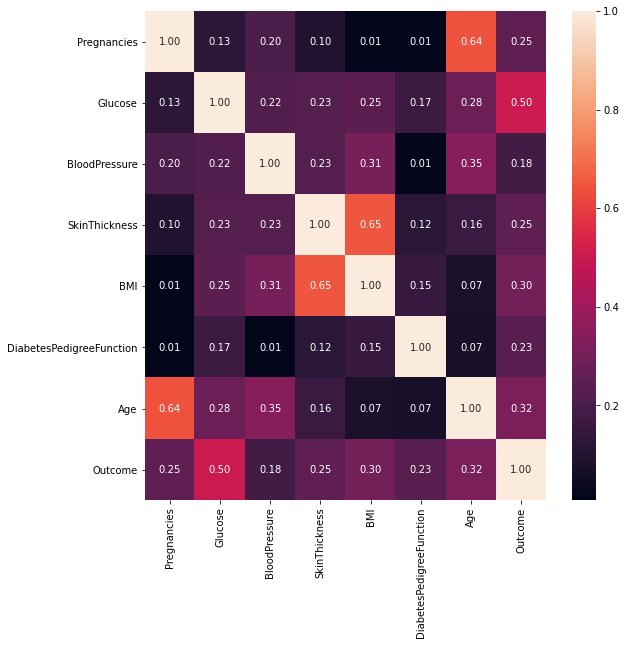

In [11]:
#Correlation Plots
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()), annot=True, cmap="rocket", fmt="0.2f");

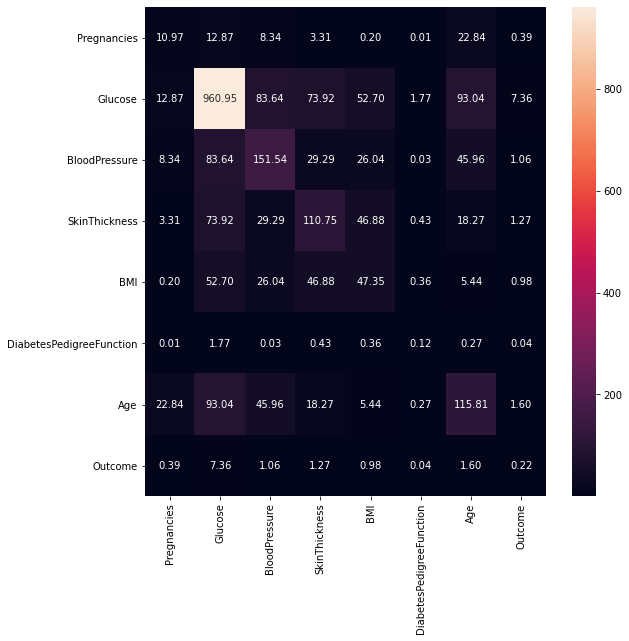

In [12]:
#Covariance plot
#data.cov()
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.cov()), annot=True, cmap="rocket", fmt="0.2f");

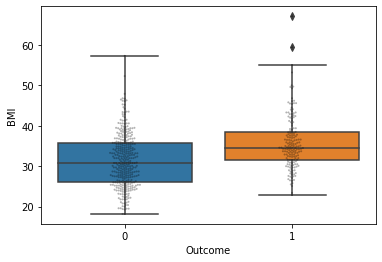

In [13]:
sns.boxplot(x="Outcome", y="BMI", data=data, whis=3.0);
sns.swarmplot(x="Outcome", y="BMI", data=data, size=2, color="k", alpha=0.3);

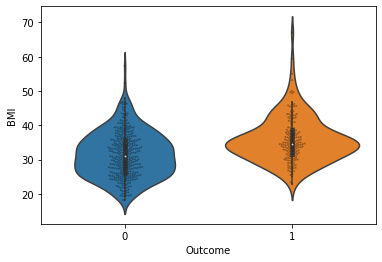

In [14]:
sns.violinplot(x="Outcome", y="BMI", data=data);
sns.swarmplot(x="Outcome", y="BMI", data=data, size=2, color="k", alpha=0.3);

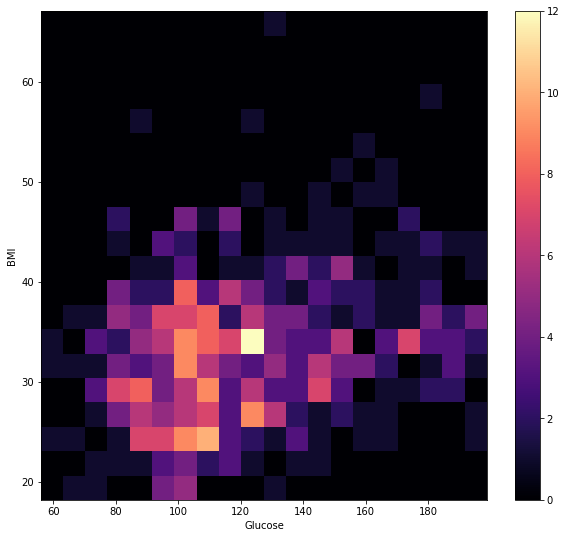

In [15]:
plt.figure(figsize=(10,9))
plt.hist2d(data["Glucose"], data["BMI"], bins=(20,20), cmap="magma")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar()

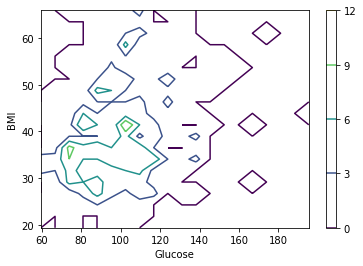

In [16]:
hist, x_edge, y_edge = np.histogram2d(data["Glucose"], data["BMI"], bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=3)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar()

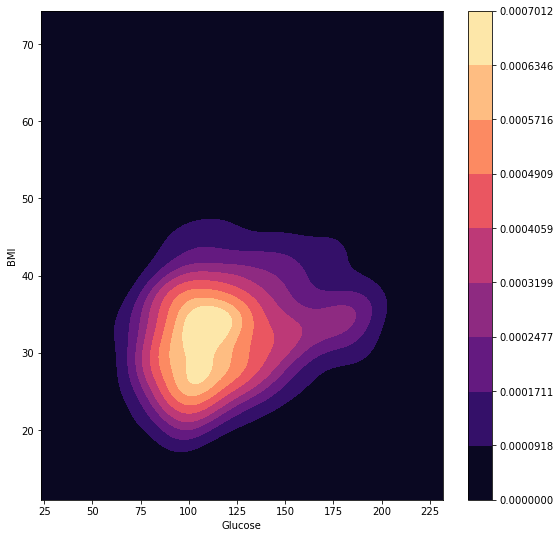

In [17]:
plt.figure(figsize=(9,9))
#sns.kdeplot(data["Glucose"], data["BMI"], cmap="viridis", bw=(4, 4));
#plt.hist2d(data["Glucose"], data["BMI"], bins=20, cmap="rocket", alpha=0.5)

sns.kdeplot(data["Glucose"], data["BMI"], cmap="magma", shade=True, cbar=True ,thresh=0);

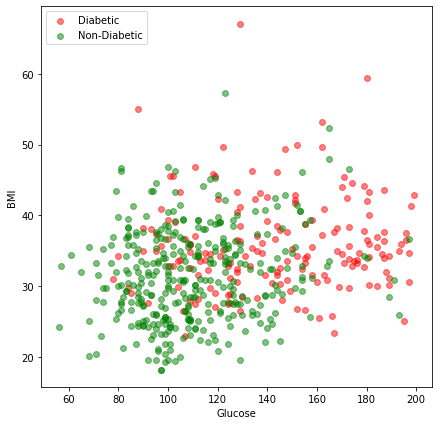

In [20]:
plt.figure(figsize=(7,7))

m = data["Outcome"] == 1
plt.scatter(data.loc[m, "Glucose"],  data.loc[m, "BMI"], c="r", s=35,alpha=0.5, label="Diabetic")
plt.scatter(data.loc[~m, "Glucose"], data.loc[~m, "BMI"], c="g", s=35,alpha=0.5, label="Non-Diabetic")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(loc=2);

In [21]:
params = ["Glucose", "BMI"]
diabetic = data.loc[m, params].values
non_diabetic = data.loc[~m, params].values

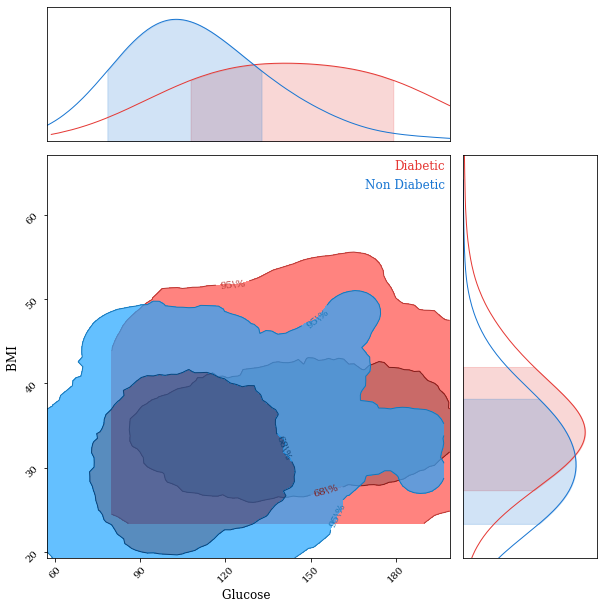

In [22]:
# a chain represents a sampling of a population that conforms to some statistical properties

c = ChainConsumer()
c.add_chain(diabetic, parameters=params, name="Diabetic", kde=1.0, color="r")
c.add_chain(non_diabetic, parameters=params, name="Non Diabetic", kde=1.0, color="b")
c.configure(contour_labels="confidence", usetex=False)
c.plotter.plot(figsize=3.0);

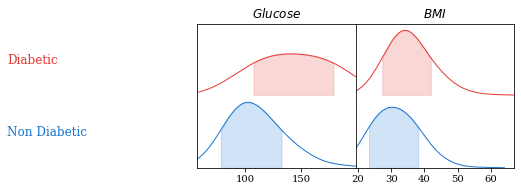

In [23]:
c.plotter.plot_summary(figsize=2.0);

In [13]:
dfp = data[["Glucose", "BMI", "Age", "Outcome"]]

In [14]:
df_y = data.loc[dfp["Outcome"] == 1, ["Glucose", "BMI", "Age"]]
df_n = data.loc[dfp["Outcome"] == 0, ["Glucose", "BMI", "Age"]]

#fig = go.Figure()
#fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'],mode='markers',marker=dict(color="red"),name='Diabetic'))
#fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'],mode='markers',marker=dict(color="blue"),name='Non Diabetic'))

#fig.show()

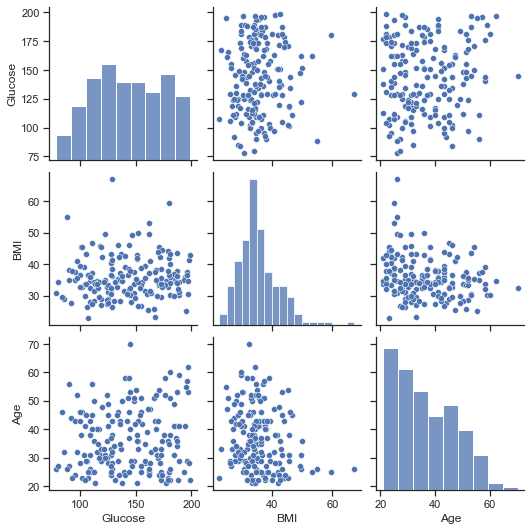

In [28]:
sns.set(style="ticks")
sns.pairplot(df_y, diag_kind = 'hist');

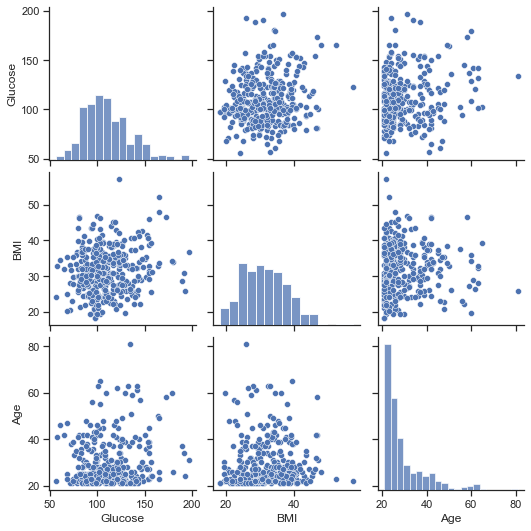

In [29]:
sns.set(style="ticks")
sns.pairplot(df_n, diag_kind = 'hist');

In [15]:
X, y = dfp.values[:,:-1], data.values[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y)

In [17]:
model = LogisticRegression()
_ = model.fit(X_train, y_train)

In [40]:
accuracy = model.score(X_test, y_test)
accuracy

0.8333333333333334

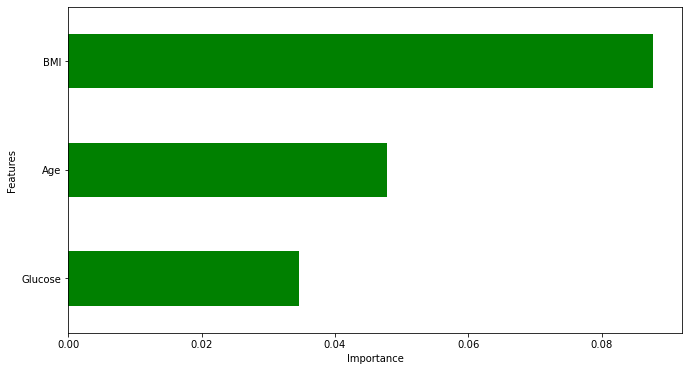

In [19]:
coeff = list(model.coef_[0])
labels = dfp.columns[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features['positive'] = features['Importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance');

In [20]:
features

,importance,positive
Features,,
Glucose,0.034573,True
Age,0.047817,True
BMI,0.087623,True


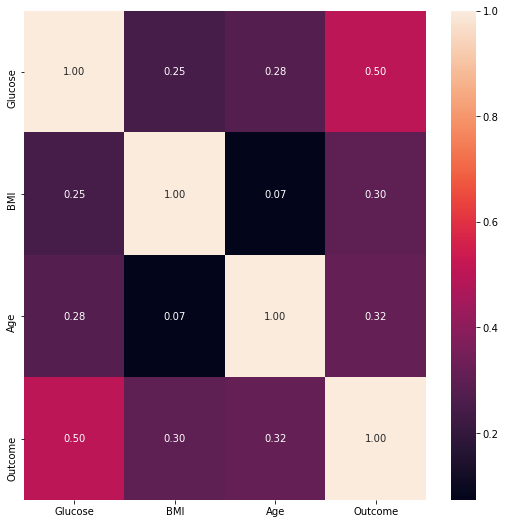

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(dfp.corr(), annot=True, cmap="rocket", fmt="0.2f");

In [27]:
test_point = [[110, 35, 52],[183 , 23.3 , 32]]

In [37]:
a = model.predict(test_point)

In [39]:
probs = model.predict_proba(test_point)
for x in range (0,2):
    if a[x]==0:
        print(f"Negative diagnosis chance is {100 * probs[0][x]:.2f}%")
    else:
        print(f"Positive diagnosis chance is {100 * probs[0][x]:.2f}%")

Negative diagnosis chance is 54.34%
Positive diagnosis chance is 45.66%
